<a href="https://colab.research.google.com/github/mohamedaminsharaf/Predicting-Disaster-Tweets/blob/main/Amit_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import tensorflow as tf
from collections import Counter
import nltk

In [2]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
#Number of Missing Data For Train Data
keyword_null = train_df['keyword'].isna().sum()
print("Keyword Null Count : " , keyword_null)
location_null = train_df['location'].isna().sum()
print("Location Null Count : " , location_null)

Keyword Null Count :  61
Location Null Count :  2533


In [6]:
#Train Data Keyword Nulls Percentage
print("Keyword Null Percentage Value : " , (keyword_null/(train_df.shape[0])*100))

Keyword Null Percentage Value :  0.8012610009194797


In [7]:
#Train Data Location Nulls Percentage
print("Location Null Percentage value : " , (location_null/(train_df.shape[0])*100))

Location Null Percentage value :  33.27203467752528


In [8]:
#Number of Missing Data For Test Data
test_keyword_null = test_df['keyword'].isna().sum()
print("Keyword Null Count : " , test_keyword_null)
test_location_null = train_df['location'].isna().sum()
print("Location Null Count : " , test_location_null)

Keyword Null Count :  26
Location Null Count :  2533


In [9]:
#Test Data Keyword Nulls Percentage
print("Test Keyword Null Percentage value : " , (test_keyword_null/(test_df.shape[0])*100))

Test Keyword Null Percentage value :  0.796812749003984


In [10]:
#Test Data Location Nulls Percentage
print("Test Location Null Percentage value : " , (test_location_null/(train_df.shape[0])*100))

Test Location Null Percentage value :  33.27203467752528


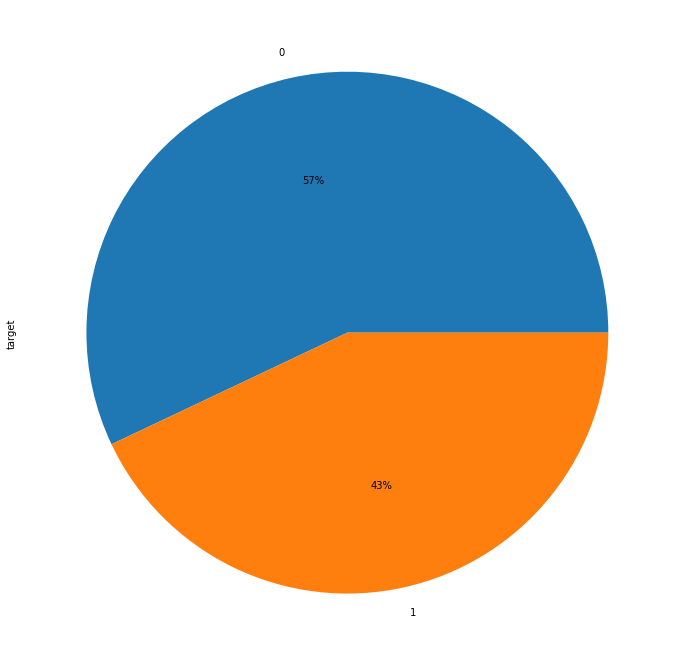

In [11]:
#How many data in each class in train data
train_df['target'].value_counts().plot(kind ='pie', autopct='%.0f%%', figsize = (15,12))

In [12]:
#Top 15 locations in Train Data
train_df['location'].value_counts()[:15].index.tolist()

['USA',
 'New York',
 'United States',
 'London',
 'Canada',
 'Nigeria',
 'UK',
 'Los Angeles, CA',
 'India',
 'Mumbai',
 'Washington, DC',
 'Kenya',
 'Worldwide',
 'Australia',
 'Chicago, IL']

In [13]:
#Top 15 keywords in Train Data
train_df['keyword'].value_counts()[:15].index.tolist()

['fatalities',
 'deluge',
 'armageddon',
 'sinking',
 'damage',
 'harm',
 'body%20bags',
 'outbreak',
 'evacuate',
 'fear',
 'collided',
 'siren',
 'twister',
 'windstorm',
 'sinkhole']

In [14]:
#Top 15 locations in Test Data
test_df['keyword'].value_counts()[:15].index.tolist()

['deluged',
 'demolished',
 'rubble',
 'first%20responders',
 'seismic',
 'obliteration',
 'sirens',
 'annihilation',
 'snowstorm',
 'avalanche',
 'dead',
 'mayhem',
 'bioterrorism',
 'catastrophic',
 'survivors']

In [15]:
#Top 15 keyword in Test Data
test_df['keyword'].value_counts()[:15].index.tolist()

['deluged',
 'demolished',
 'rubble',
 'first%20responders',
 'seismic',
 'obliteration',
 'sirens',
 'annihilation',
 'snowstorm',
 'avalanche',
 'dead',
 'mayhem',
 'bioterrorism',
 'catastrophic',
 'survivors']

In [16]:
#Most Common Words
pd.Series(' '.join(train_df['text']).lower().split()).value_counts()[:10]

the    3207
a      2135
in     1949
to     1934
of     1814
and    1405
i      1336
is      930
for     880
on      834
dtype: int64

In [17]:
pos_words = []
neg_words = []
for text in train_df[train_df['target']==1].text.str.split():
  for subtext in text:
    pos_words.append(subtext)
for text in train_df[train_df['target']==0].text.str.split():
  for subtext in text:
    neg_words.append(subtext)

all_words = pos_words + neg_words

In [18]:
most_common_words = Counter(all_words)

In [19]:
most_common_words = most_common_words.most_common()[:10]

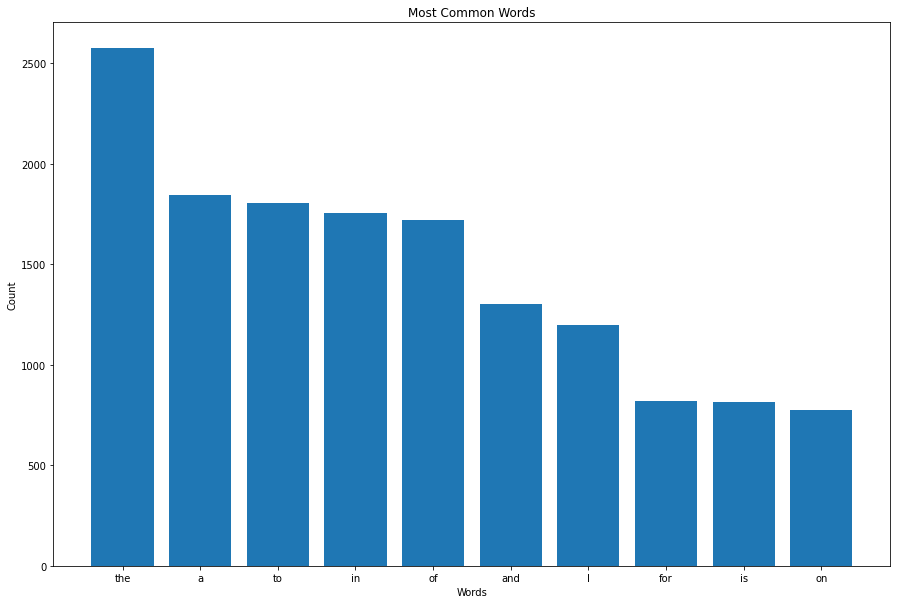

In [20]:
ind = []
fre = []
for item in most_common_words:
   ind.append(item[0])
   fre.append(item[1])
fig = plt.figure(figsize= (15,10))

plt.bar(ind, fre)
plt.ylabel('Count')
plt.xlabel('Words')
plt.title("Most Common Words")
plt.show()

In [21]:
#Removing stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english')
no_stop_words = []
stop_words = []
for word in all_words:
  if word not in stop_word:
    no_stop_words.append(word)
  else:
    stop_words.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
final_stopwords = Counter(stop_words)

In [23]:
most_common_stopwords = final_stopwords.most_common()[:10]

In [24]:
most_common_stopwords

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('you', 632)]

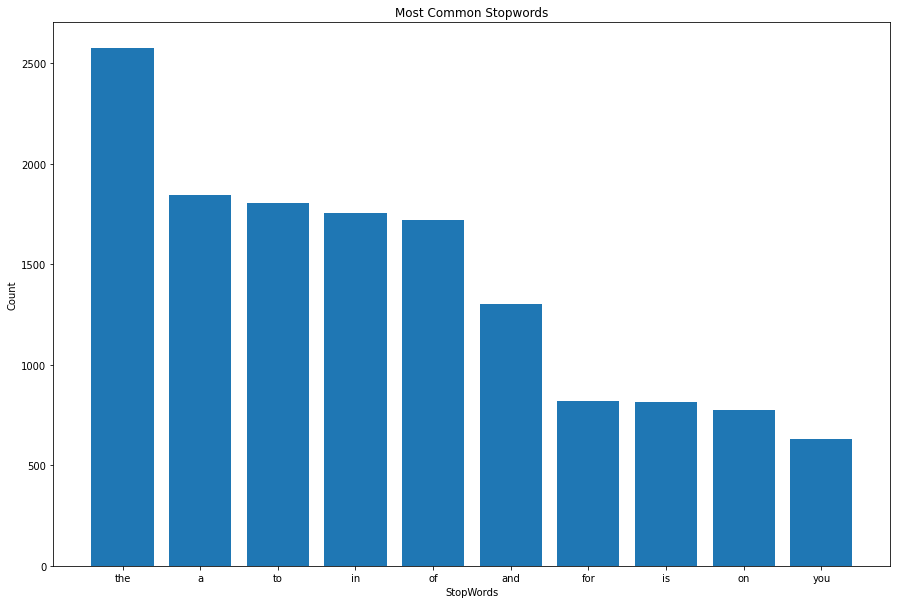

In [25]:
#Bar Plot for Most Common StopWords
ind = []
fre = []
for item in most_common_stopwords:
   ind.append(item[0])
   fre.append(item[1])
fig = plt.figure(figsize= (15,10))

plt.bar(ind, fre)
plt.ylabel('Count')
plt.xlabel('StopWords')
plt.title("Most Common Stopwords")
plt.show()

#NLP

In [26]:
#Cleaning the tweet
def clean_tweet(tweet):
  tweet = re.sub(r'@\w*','',tweet) 
  tweet = re.sub(r'\W+',' ',tweet) 
  tweet = re.sub(r'https?:\S*','',tweet)
  tweet = re.sub(r'\d*','',tweet)
  

  return tweet

In [27]:
clean_tweets = []
text_array = np.array(train_df['text'])
for text in text_array:
  clean_tweets.append(clean_tweet(text))

In [28]:
test_clean_tweets = []
text_array = np.array(test_df['text'])
for text in text_array:
  test_clean_tweets.append(clean_tweet(text))

In [29]:
#Split Text
test_splitted_tweet = []
for text in test_clean_tweets:
  test_splitted_tweet.append(text.split())

In [30]:
splitted_tweet = []
for text in clean_tweets:
  splitted_tweet.append(text.split())

In [31]:
#Remove Stopwords after removing regular expressions
stop_words = stopwords.words('english')
re_no_stop_words = []
re_no_stop_words_tweet = []
re_stopwords = []
for tweet in splitted_tweet:
  re_no_stop_words = []
  for word in tweet:
    if word not in stop_words:
      re_no_stop_words.append(word)
    else:
      re_stopwords.append(word)
  
  re_no_stop_words_tweet.append(list(re_no_stop_words))

In [32]:
stop_words = stopwords.words('english')
test_re_no_stop_words = []
test_re_no_stop_words_tweet = []
test_re_stopwords = []
for tweet in test_splitted_tweet:
  test_re_no_stop_words = []
  for word in tweet:
    if word not in stop_words:
      test_re_no_stop_words.append(word)
    else:
      test_re_stopwords.append(word)
  
  test_re_no_stop_words_tweet.append(list(test_re_no_stop_words))

In [33]:
#Keeping in the tweet only verbs, pronouns, nouns and adjectives
nltk.download('averaged_perceptron_tagger')
re_no_stop_words_tweets = []
re_no_stop_words_tweets_f = []
for i in re_no_stop_words_tweet:
  re_no_stop_words_tweets = []
  tweet = nltk.pos_tag(i)
  for j in tweet:
    if j[1][0] in ['N','R','V', 'J']:
      re_no_stop_words_tweets.append(j[0])
  re_no_stop_words_tweets_f.append(list(re_no_stop_words_tweets))
re_no_stop_words_tweets_f[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive']

In [34]:
nltk.download('averaged_perceptron_tagger')
test_re_no_stop_words_tweets = []
test_re_no_stop_words_tweets_f = []
for i in test_re_no_stop_words_tweet:
  test_re_no_stop_words_tweets = []
  tweet = nltk.pos_tag(i)
  for j in tweet:
    if j[1][0] in ['N','R','V', 'J']:
      test_re_no_stop_words_tweets.append(j[0])
  test_re_no_stop_words_tweets_f.append(list(test_re_no_stop_words_tweets))
test_re_no_stop_words_tweets_f[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['Just', 'happened', 'terrible', 'car', 'crash']

In [35]:
re_no_stop_words_tweets_f[0]

['Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive']

In [36]:
#Stemwords for data
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
stem_words = []
stemwords = []
for i in re_no_stop_words_tweets_f:
  stem_words = []
  for j in i:
    x = snow_stemmer.stem(j)
    stem_words.append(x)
  stemwords.append(list(stem_words))
stemwords[0]

['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv']

In [37]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
test_stem_words = []
test_stemwords = []
for i in test_re_no_stop_words_tweets_f:
  test_stem_words = []
  for j in i:
    x = snow_stemmer.stem(j)
    test_stem_words.append(x)
  test_stemwords.append(list(test_stem_words))
test_stemwords[0]

['just', 'happen', 'terribl', 'car', 'crash']

In [38]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(stemwords)
tokenized_tweet =tokenizer.texts_to_sequences(stemwords)

In [39]:
tokenizer.fit_on_texts(test_stemwords)
test_tokenized_tweet =tokenizer.texts_to_sequences(test_stemwords)

In [40]:
#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(tokenized_tweet)

In [41]:
test_padded=pad_sequences(test_tokenized_tweet)

In [42]:
test_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  179,
        162, 1354,   56,   22], dtype=int32)

In [43]:
padded[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 3703,  481,
         220,  925, 1403, 2965],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  150,    4,
         679, 5220, 5221, 1090],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 1404,  543, 1690,  411, 5222,  221,   36,
        1690,  411,  326,  449],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   11, 2477,
         109,   36,  326,   45],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  197,   59, 1091,  146, 5223, 1691,
         222,  109, 2478,  134],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  

In [44]:
train_target = train_df['target'].values

In [45]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, train_target, test_size=0.2, random_state=42)

In [165]:
#LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(len(tokenizer.word_index)+1,10, input_length=26))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(Dropout(0.80))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 26, 10)            200230    
                                                                 
 global_average_pooling1d_27  (None, 10)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_108 (Dense)           (None, 64)                704       
                                                                 
 dense_109 (Dense)           (None, 32)                2080      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_110 (Dense)           (None, 1)                 33        
                                                     

In [166]:
history = model.fit(X_train, y_train, validation_split = 0.1, verbose=1, epochs = 15, batch_size = 600)

Epoch 1/15
10/10 [==============================] - 1s 26ms/step - loss: 0.6914 - accuracy: 0.5512 - val_loss: 0.6885 - val_accuracy: 0.5698
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 0.6868 - accuracy: 0.5694 - val_loss: 0.6841 - val_accuracy: 0.5698
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.5694 - val_loss: 0.6794 - val_accuracy: 0.5698
Epoch 4/15
10/10 [==============================] - 0s 10ms/step - loss: 0.6772 - accuracy: 0.5694 - val_loss: 0.6746 - val_accuracy: 0.5698
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.5696 - val_loss: 0.6682 - val_accuracy: 0.5698
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.5718 - val_loss: 0.6581 - val_accuracy: 0.5698
Epoch 7/15
10/10 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.5869 - val_loss: 0.6420 - val_accuracy: 0.5977
Epoch 8/15
10/1

In [167]:
y = model.predict(X_test)

In [168]:
model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8129


[0.45684346556663513, 0.8128693103790283]

Text(0.5, 0, 'Epochs')

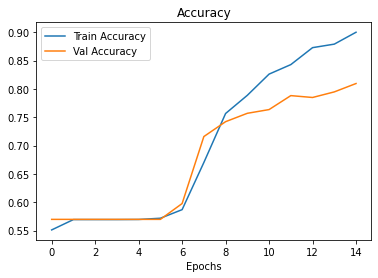

In [169]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy','Val Accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'epochs')

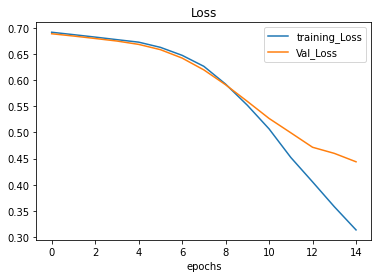

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [171]:
model.save("Disaster_tweet_model.h5")